In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def buildMatrix(N, d): 
    '''
    Parameters:
    N: int Matrix size.
    d: float Diagonal content.
    '''
    A = np.zeros((N,N))  # Matriz de ceros
    
    A[0,0] = d   # Primera fila
    A[0,1] = -1
    
    A[N-1,N-2] = -1  # Última fila
    A[N-1,N-1] = d
    
    for i in range (1,N-1):  # Filas centrales
        A[i,i] = d
        A[i,i+1] = -1
        A[i,i-1] = -1

    return A

In [3]:
L = 1     # Parámetros físicos: L, TA, TB, k, S, w
TA = 0
TB = 1000
k = 1.0
S = 20
w = 2.5 * np.pi

In [4]:
N = 32     # Parámetros numéricos: N, h, r 
h = L / (N + 1)
r = k / h**2

In [5]:
T = np.zeros(N + 2)  # Matriz T guarda la solución
T[0] = TA
T[-1] = TB

In [6]:
b = np.zeros(N)  # Lado derecho del sistema
b[:] = S / r
b[0] += T[0]
b[-1] += T[-1]

In [7]:
A = buildMatrix(N, 2- w**2/r) # Construcción de la matriz

T[1:N+1]=np.linalg.solve(A,b) # Solución del sistema lineal

T =  [   0.          236.41829365  459.42660663  656.39291514  816.16031178
  929.67897447  990.51878213  995.23354084  943.55618903  838.41392494
  685.76239913  494.24836418  274.71989034   39.61189034 -197.75824055
 -423.94497153 -626.13624132 -792.87918121 -914.72884827 -984.78322225
 -999.07416175 -956.79217458 -860.3322704  -715.1582985  -529.49345486
 -313.85448971  -80.45599946  157.48145363  386.48020352  593.56890566
  767.01728249  897.00057009  976.15602955 1000.        ]


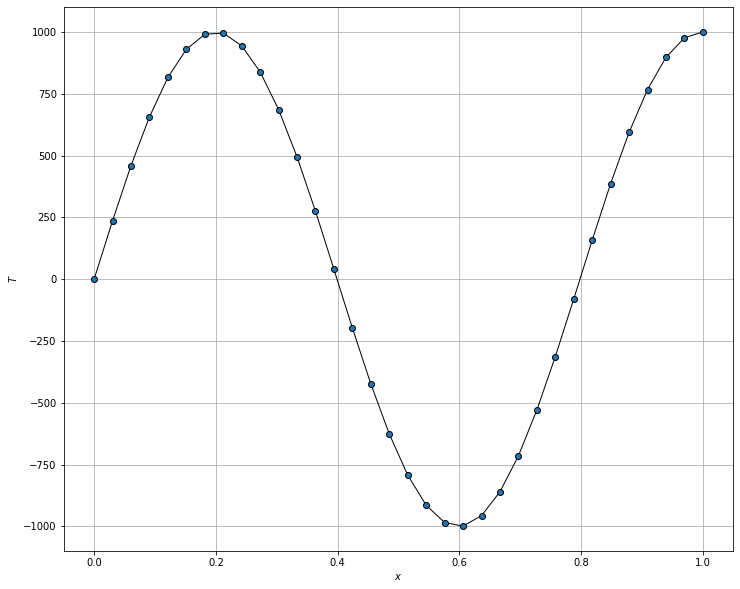

In [8]:
print('T = ', T)             # Impresión y graficación de la solución
x = np.linspace(0, L, N+2)
plt.figure(figsize=(12,10))
plt.plot(x, T, c='black', lw=1.0)
plt.scatter(x, T, edgecolor='k', zorder= 12)
plt.xlabel('$x$')
plt.ylabel('$T$')
plt.grid()
plt.show()

In [9]:
# Agrega la función: def solExact(x, w):
def solExact(x, w):
    return (((1.0 - np.cos(w)) / np.sin(w)) * np.sin(w * x) + np.cos(w * x))

In [10]:
Error = np.linalg.norm(solExact(x,w) - T, 2)  # Cálculo del error

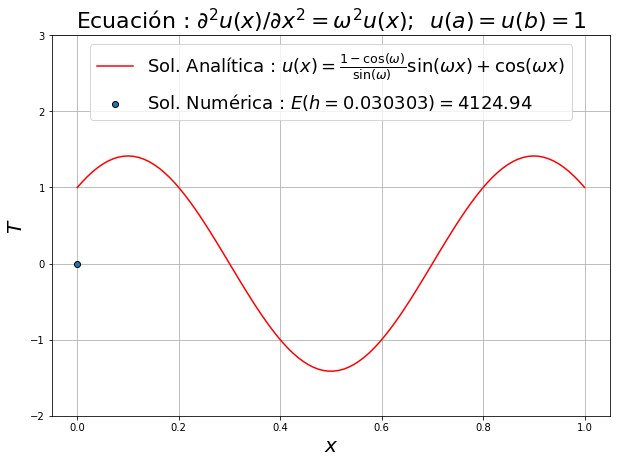

In [11]:
# El código siguiente realiza las gráficas usando lo calculado en las celdas anteriores

titulo = 'Ecuación : $\partial^2 u(x)/\partial x^2 = \omega^2 u(x); \,\,\, u(a) = u(b) = 1$'
numerica = 'Sol. Numérica : $E(h = %g) = %g$' % (h, Error)
exacta = 'Sol. Analítica : $u(x) = \\frac{1 - \cos(\omega)}{\sin(\omega)} \sin(\omega x) + \cos(\omega x)$'

plt.figure(figsize=(10,7))
xsol = np.linspace(0,1,100)
plt.plot(xsol, solExact(xsol,w),'r-', label=exacta)
plt.scatter(x, T, edgecolor='k', zorder= 10, label=numerica)
plt.title(titulo, fontsize=22)
plt.xlabel('$x$', fontsize=20)
plt.ylabel('$T$', fontsize=20)
plt.ylim(-2.0,3.0)
plt.legend(loc='upper center', fontsize=18)
plt.grid()
plt.savefig('calibracion1_e.pdf')
plt.show()